In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
from sklearn import linear_model
import seaborn as sns

df = pd.read_csv('weight-height.csv')
male_df = df[df['Gender'] == 'Male'][:200]
male_df.head(3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [13]:
print(73.847017 * 2.54)

187.57142317999998


# Data cleaning

In [14]:
# convert inch to cm lbs to kg
male_df['Height'] = male_df['Height'].apply(lambda x: x * 2.54)
male_df['Weight'] = male_df['Weight'].apply(lambda x: x * 0.45359237)

male_df.head()

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695


<AxesSubplot:xlabel='Weight', ylabel='Height'>

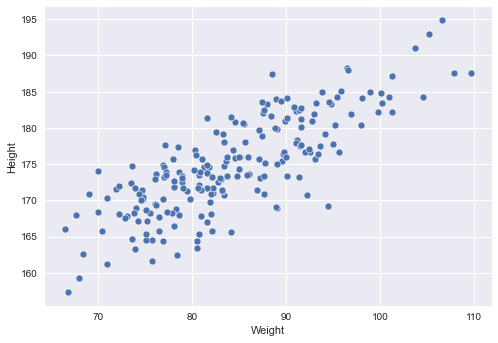

In [15]:
sns.scatterplot(x='Weight', y='Height', data=male_df)

In [16]:
def best_fit_line(xs, ys):  
    slope_m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    y_intercept_b = mean(ys) - slope_m * mean(xs)
    
    value_of_mean = sum(xs)/len(xs)   
    
    return slope_m, y_intercept_b
    
    #y=mx+b
    #b = y-mx



In [17]:
# convert it into list cuz we need to converty it np array
Height_list = male_df['Height'].to_list()
Weight_list = male_df['Weight'].to_list() 

# convert it to np array cuz we will need to get the mean and slope 
xs = np.array(Height_list, dtype=np.float64)
ys = np.array(Weight_list, dtype=np.float64)


# now find slope and y-intercept
slope_m,  y_intercept_b = best_fit_line(xs, ys)


In [18]:
slope_m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))

print(slope_m, y_intercept_b)

1.05162984643307 -99.54090158151442


In [19]:
# get regression_lien
regression_line = [(slope_m * x) + y_intercept_b for x in xs]


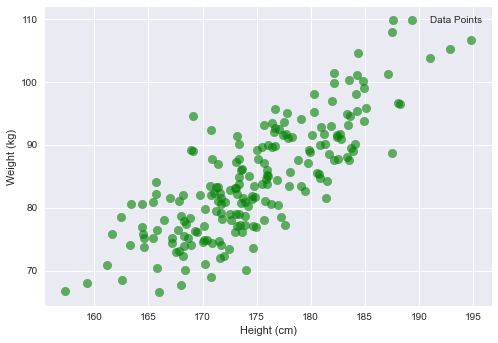

In [20]:
# Plot outputs and plot customization
style.use('seaborn')
plt.scatter(xs,ys,label='Data Points', alpha=0.6,color='green',s=75)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

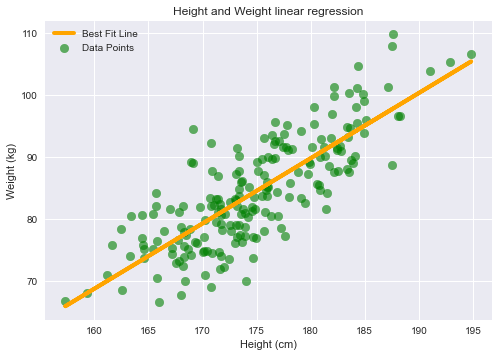

In [21]:
# Plot outputs and plot customization
style.use('seaborn')
plt.scatter(xs,ys,label='Data Points', alpha=0.6,color='green',s=75)
plt.plot(xs,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('Height and Weight linear regression')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

<AxesSubplot:>

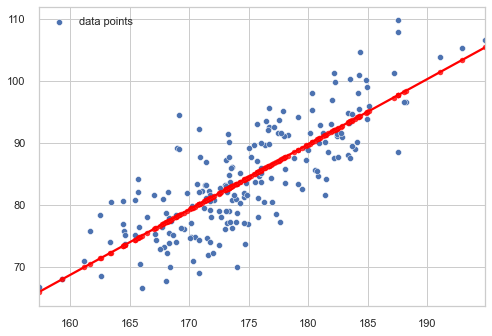

In [32]:
# Now plot it
sns.set()
sns.set_style('whitegrid')
sns.scatterplot(y=ys, x=xs, label='data points', sizes=(40, 400),)
# sns.scatterplot(y=ys, x=xs)
sns.regplot(x=xs, y=regression_line, marker='o', color='red', scatter_kws={'s':30})

##### find the weight of a ave_men_height = 175.26

In [34]:
ave_men_height = 175.26 
# y = mx + b

ava_men_weight = (slope_m * ave_men_height) + y_intercept_b
print(ava_men_weight)

84.76774530434542


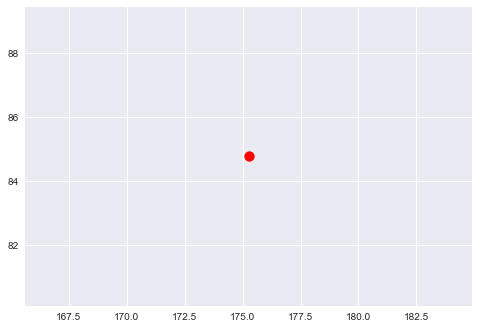

In [44]:
plt.scatter(ave_men_height, ava_men_weight, label='ava_men_weight',color='red',s=100)
plt.show()

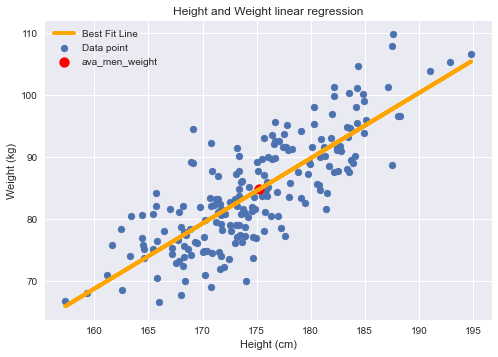

In [76]:
# Plot outputs and plot customization
style.use('seaborn')

plt.scatter(xs, ys, label='Data point')
plt.plot(xs,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.scatter(ave_men_height, ava_men_weight, label='ava_men_weight',color='red',s=100)


plt.title('Height and Weight linear regression')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

# Method

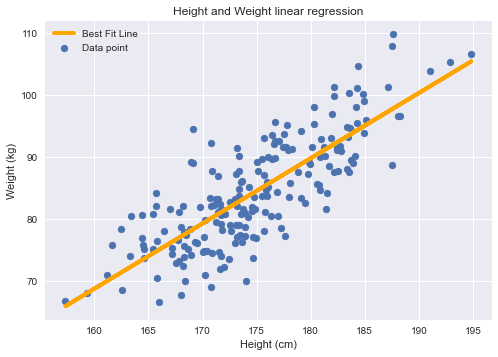

In [71]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(xs.reshape(-1,1), ys)  # resahpe() to make it a list
pred_regression_line = model.predict(xs.reshape(-1,1))

# Plot outputs and plot customization
style.use('seaborn')

plt.scatter(xs, ys, label='Data point')
plt.plot(xs, pred_regression_line, label='Best Fit Line', color='orange',linewidth=4)

plt.title('Height and Weight linear regression')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

73.9780230799428


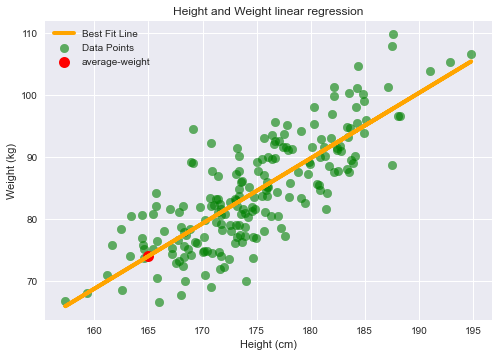

In [90]:
# make prediction ave_men_height = 180
men_height = 165
pred_men_weight = model.predict(np.array([[men_height]]))[0]
print(pred_men_weight)



# Plot outputs and plot customization
style.use('seaborn')

plt.scatter(xs,ys,label='Data Points', alpha=0.6,color='green',s=75)
plt.plot(xs,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.scatter(men_height,pred_men_weight,label='average-weight', color='red',linewidth=4)


plt.title('Height and Weight linear regression')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()



### why do we need to make it xs value xs.reshape(1,-1)